<a href="https://colab.research.google.com/github/Repollo1000/ADA-Informes/blob/main/Informe_OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Descripción del problema(optimización)**

Los problemas de optimización,

Se usan cuando los subproblemas se repiten, para este caso cuando los subproblemas se repiten es necesario guardar cada subproblema para resolverlo una vez para evitar realizar el mismo trabajo más de una vez.


*   los problemas que requieren maximizar o minimizar ciertas cantidades o problemas de conteo.
*   Todos los problemas de programación dinámica satisfacen la propiedad de subproblemas superpuestos 

En este informe resolveremos el problema de Árboles binarios de búsqueda óptimos.

La idea de construir este árbol es minimizar el costo de búsqueda:


**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$


**Salida**: Construir un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado).







foto

# **2.Decripción del algoritmo**

Existen varias formas de implementarn el algoritmo BST en esta ocacion veremos 2, algoritmo recursivo y bottom-up (programación dinámica).

algoritmo recursivo para resolver el problema del árbol binario de búsqueda óptimo:

Este manera de de resover el prblema es muy poco eficiente(sera demostrado mas adelante), debido a que no guarda la soluciones de los subproblemas ya resueltos

La entrada es la misma que esta descrita en la descripcion del problema con una pequeña diferencia que tambien le ingresamos los indices iniciales y finalesdel arreglo si el arrglo es de n elementos a la funcion le pasaremos **0** y **n-1**

Para calcular nuestro minimo debemos seguir ciertos pasos y codiciones:



*   si nuetro ultimo elemento, es menor al inicial retornamos el valor que esta en nuestro arreglo de probabilidades en las claves ficticias(se le puede llamar caso base)
*   Se calcula la suma de probabilidades de ambos arreglos ingresados **p** y **q**
*   la sumas se guardan en una variable encargada de tener las probabilidades

*  Debemos inicializar el costo minimo con una funcion que te ofrece la biblioteca math de python, que es "inf" que representa un numero muy grande
*  para cada raiz dentro del rango adecuado se le calcula su minimo para la rama izquierda(raíz actual - 1) y derecha(raíz actual + 1), al ser una funcion recursiva podremos llegar al "caso base"
*  ahora debemos analizar el costo minimo calculado si es menor al costo minimo anterior se remplaza 
*  Por ultimo, podemos observar que al ser un algoritmo recursivo y que siempre estaremos almacenando el costo minimo y habremos solucionado el problema





bottom-up (programación dinámica) para resolver el problema:

Este algoritmo recibe 3 parámetros principales *p*, *q* y *n*

p , q son probabilidades y n es el tamaño de la matriz.

Fases:



*   inicializamos e[i; i - 1] y w[i; i - 1]. 
*   en la primera iteración, cuando l es == 1, e[i; i] y w[i; i] for i = 1, 2..... n
*   en la segunda iteración, cuando l es == 1, e[i; i] y w[i; i] for i = 1, 2..... n - 1
* se guardan los valores actuales de r en
root[i; j] 



## **Ejemplo paso a paso**

Obtendremos los siguientes datos



```
 i	  0	  1	  2	   3
pi	        0.5    0.1	 0.05
qi	0.15	0.1	0.05	0.05
```

Creamos las matrices **e** , **w** y **root**

Ahora inicializamos las matrices de esta manera


primero **w** y **e**:

Se debe cumplir que j = i - 1

$$w[1,0] = \sum_{m=1}^{0}p_m + \sum_{m=0}^{0}q_m = q_0= 0.15$$
$$w[2,1] = \sum_{m=2}^{1}p_m + \sum_{m=1}^{1}q_m = q_1= 0.1$$
$$w[3,2] = \sum_{m=3}^{2}p_m + \sum_{m=2}^{2}q_m = q_2= 0.05$$
$$w[4,3] = \sum_{m=4}^{3}p_m + \sum_{m=3}^{3}q_m = q_3= 0.05$$

```
[w]             i
     1      2      3      4
  3 [0]    [0]    [0]   [0.05]

  2 [0]    [0]    [0.05]
j
  1 [0]   [0.1]

  0 [0.15]
```

Ahora vemos como queda la matiz **e**

```


e[1,  0] = q0 = 0.15  se debe cumplir ( j = i – 1)

e[2,  1] = q1 = 0.1   se debe cumplir ( j = i – 1)

e[3,  2] = q2 = 0.05  se debe cumplir ( j = i – 1)

e[4,  3] = q3 = 0.05  se debe cumplir ( j = i – 1)


```

Quedaría así:


```
[e]            i
     1      2      3      4
  3 [0]    [0]    [0]   [0.05]

  2 [0]    [0]    [0.05]
j
  1 [0]   [0.1]

  0 [0.15]
```

El segundo paso seria:
$$w[1,1] = p_1 + q_0 + q_1 = 0.75$$
$$w[2,2] = p_2 + q_1 + q_2 = 0.25$$
$$w[3,3] = p_3 + q_2 + q_3 = 0.15$$

```
[w]             i
     1      2      3      4
  3 [0]    [0]   [0.15] [0.05]

  2 [0]   [0.25]  [0.05]
j
  1 [0.75] [0.1]

  0 [0.15]
```
```

e[1,  1] = min { e[1,  0] + e[2,  1] + w(1, 1) }

        =   min { 0.15 + 0.1 + 0.75 } = 1.0

e[2,  2] =   min { e[2,  1] + e[3,  2] + w(2, 2) }

        =   min { 0.1 + 0.05 + 0.25 } = 0.4

 e[3,  3] =   min { e[3,  2] + e[4,  3] + w(3, 3) }

         = min { 0.05 + 0.05 + 0.15 } = 0.25


```
```
[e]            i
     1       2       3       4
  3 [0]    [0]     [0.25]   [0.05]

  2 [0]    [0.4]   [0.05]
j
  1 [1.0]  [0.1]

  0 [0.15]

```
Sí repetimos estos pasos correctamente hasta completar la matriz nos quedaría algo así:


```
[w]             i
     1         2         3        4
  3 [1.0]    [0.35]    [0.15]   [0.05]

  2 [0.90]   [0.25]    [0.05]
j
  1 [0.75]   [0.1]

  0 [0.15]
```
```
[e]            i
     1         2       3       4
  3 [1.95]   [0.8]   [0.25]   [0.05]

  2 [1.45]   [0.4]   [0.05]
j
  1 [1.0]    [0.1]

  0 [0.15]

```
Ahora debemos construir el árbol para eso se deben cumplir ciertas condiciones


e[1, 3] es mínimo de r = 1, so r[1, 3] = 1

e[2, 3] es mínimo de r = 2, so r[2, 3] = 2

e[1, 2] es mínimo de r = 1, so r[1, 2] = 1

e[3, 3] es mínimo de r = 3, so r[3, 3] = 3

e[2, 2] es mínimo de r = 2, so r[2, 2] = 2

e[1, 1] es mínimo de r = 1, so r[1, 1] = 1


Nos quedaría la matriz del árbol de esta manera:


```
[root]  
           i
     1     2     3       
  3 [1]   [2]   [3]   

  2 [1]   [2]   
j
  1 [1]    

```



## **2.1.Codigo**

### **bottom-up**

In [5]:
import numpy as np
from math import inf
import random  
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

def optimalBST(p, q, n,cont, verbose=False):

#se crean las matrices
  e = np.zeros((n+2,n+1))
  w = np.zeros((n+2,n+1))
  root = np.zeros((n+1, n+1), dtype = int)

#se inicializan las matrices   
  for i  in range(1,n+2):
    e[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]

  if(verbose == True):
    print("\n\nSe crean y se inicializa la diagonal\n\n")
    print("Matriz que guardara los costos minimos")
    print(e)
    print()
    print("Matriz que guardara las probabilidades")
    print(w)


  for l  in range(1,n + 1):
    for i in range(1, n - l + 2):
      j = i + l - 1
      e[i][j] = inf
      w[i][j] = w[i][j-1] + p[j - 1] + q[j]

      if(verbose == True):
        print("Suma de probabilidades entre ","[",i,"]","[",j,"]","=",round(w[i][j],4))
      cont[0] +=1
      for  r  in range(i,j + 1):
          t  = e[i][r - 1] + e[r + 1][j] + w[i][j]
          if t  < e[i][j] :
            e[i][j] = t
            root[i][j] = r
            if(verbose == True):
              print("Costo de la raiz ","[",i,"]","[",j,"]","=",round(e[i][j],4))
      if(verbose == True):
        print("Matriz que guardara los costos minimos")
        print(e)
        print()
        print("Matriz que guardara las probabilidades")
        print(w)
      if(verbose == True):
        print("\n")

#print(e,root)
  return (e, root)

cont = [0]
p = [0.5  ,  0.1   ,  0.05]
q = [0.15  ,  0.1 ,   0.05 ,   0.05]

p = [0.2  ,  0.3  ]
q = [0.15  ,  0.1 ,   0.05 ]

verbose = False
(e, root) = optimalBST(p, q, len(p),cont,verbose)

print("Resultados: \n")
print(e)
print( )
print(root)
print("Comparaciones: ",cont[0])


Resultados: 

[[0.   0.   0.  ]
 [0.15 0.7  1.55]
 [0.   0.1  0.6 ]
 [0.   0.   0.05]]

[[0 0 0]
 [0 1 2]
 [0 0 2]]
Comparaciones:  3


### **Recursivo**

In [7]:
import numpy as np
from math import inf

def recursiveBST(p, q, cont, inicio , fin,verbose = False):
  cont[0]+=1
  
  #caso base
  if(inicio > fin): 
    return q[inicio-1]

  prob1 = sum(p[inicio - 1: fin])
  prob2 = sum(q[inicio - 1: fin + 1])
  probTotal = prob2 + prob1

  minTot = inf

  for r in range(inicio, fin + 1):
    minIzq = recursiveBST(p,q,cont,inicio, r - 1)
    minDer = recursiveBST(p,q,cont,r + 1, fin)
    minActual = minIzq + minDer + probTotal
    if(verbose == True):
        print("Costo de la raiz: ",round(minActual,4))
    
    if(minActual < minTot ):
      minTot = minActual
      if(verbose == True):
        print("Costo minimo de la raiz: ",round(minTot,4))
        print(" ")
    else:
      if(verbose == True):
        print("Se mantinene el costo anterior",round(minTot,4))
        print(" ")

  return minTot

verbose = False
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
cont = [0]
costoEsperado = recursiveBST(p, q, cont, 1 , len(p),verbose)
print(" ")
print("Costo minimo:", costoEsperado)
print("Cantidad llamadas recursivas:", cont[0])


 
Costo minimo: 2.75
Cantidad llamadas recursivas: 243


## **2.2.Verbose** 

### **Verbose bottom-up**

In [ ]:
cont = [0]
p = [0.5  ,  0.1   ,  0.05]
q = [0.15  ,  0.1 ,   0.05 ,   0.05]

verbose = True
(e, root) = optimalBST(p, q, len(p),cont,verbose)

print("Resultados: \n")
print(e)
print( )
print(root)
print("Comparaciones: ",cont[0])



Se crean y se inicializa la diagonal


Matriz que guardara los costos minimos
[[0.   0.   0.   0.  ]
 [0.15 0.   0.   0.  ]
 [0.   0.1  0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.   0.   0.   0.05]]

Matriz que guardara las probabilidades
[[0.   0.   0.   0.  ]
 [0.15 0.   0.   0.  ]
 [0.   0.1  0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.   0.   0.   0.05]]
Suma de probabilidades entre  [ 1 ] [ 1 ] = 0.75
Costo de la raiz  [ 1 ] [ 1 ] = 1.0
Matriz que guardara los costos minimos
[[0.   0.   0.   0.  ]
 [0.15 1.   0.   0.  ]
 [0.   0.1  0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.   0.   0.   0.05]]

Matriz que guardara las probabilidades
[[0.   0.   0.   0.  ]
 [0.15 0.75 0.   0.  ]
 [0.   0.1  0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.   0.   0.   0.05]]


Suma de probabilidades entre  [ 2 ] [ 2 ] = 0.25
Costo de la raiz  [ 2 ] [ 2 ] = 0.4
Matriz que guardara los costos minimos
[[0.   0.   0.   0.  ]
 [0.15 1.   0.   0.  ]
 [0.   0.1  0.4  0.  ]
 [0.   0.   0.05 0.  ]
 [0.   0.   0.   0.05]]

Matriz qu

### **Recursivo**

In [ ]:
verbose = True
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
cont = [0]
costoEsperado = recursiveBST(p, q, cont, 1 , len(p),verbose)
print(" ")
print("Costo minimo:", costoEsperado)
print("Cantidad llamadas recursivas:", cont[0])

Costo de la raiz:  3.05
Costo minimo de la raiz:  3.05
 
Costo de la raiz:  2.75
Costo minimo de la raiz:  2.75
 
Costo de la raiz:  2.8
Se mantinene el costo anterior 2.75
 
Costo de la raiz:  2.75
Costo minimo de la raiz:  2.75
 
Costo de la raiz:  2.85
Se mantinene el costo anterior 2.75
 
 
Costo minimo: 2.75
Cantidad llamadas recursivas: 243


# **3.Correctitud**


Para demostrar el que el algoritmo bottom-up es correcto, debemos calcular el costo mínimo, lo que nos llevara una búsqueda bastante exhaustiva de todas las posibilidades, para eso etiquetamos los nodos de ***k_1,k_2...k_n *** para crear el árbol binario y agregarle las claves ficticias, esta búsqueda de árbol binario con n nodos tendíamos que examinar un número exponencial de árboles, por lo que es normal que debamos resolver este problema con programación dinámica.

**Sub estructura óptima**

Para la sub estructura optima debemos considerar que cualquier sub árbol **$k_i...k_j $** debemos saber que se debe cumplir que **$1 <= i <= j <= n$**, donde los sub arboles deben contener claves ficticias **$di-1,....dj$**

Ahora sabemos que el árbol binario de búsqueda óptimo **T** tiene sub árboles que contienen las claves **$k_i...k_j $** con sus respectivas claves ficticias **$d_i-1,....d_j$** podemos decir que $k_r (i <=  r <= j)$ es sub raíz de una sub árbol óptimo que contiene todas las claves 

El subárbol izquierdo contendría todas la clave k_r  **$k_i...k_r-1 $** y **$di-1,....dr-1$** y el sub árbol derecho contiene **$k_r+1...k_j $**.

Al examinar todos los candidatos $k_r$ y aseguraríamos que encontramos árbol binario de búsqueda óptimo mientras $i<= r <= j$


**Definir una función recurrente**

para definir nuestra función recurrente debemos saber nuestro dominio de subproblema que contenga las claves **$k_i...k_j $** cuando **$1 <= i <= j <= n$**. Ahora podemos definir e[i,j] que es el costo esperado 





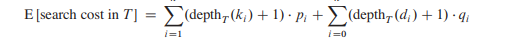

La manera de calcular la suma de las probabilidades para cada sub árbol seria:

$w[i,j] = \sum_{l=i}^{j}p_l + \sum_{l=i-1}^{j}q_l$

De esta manera tenemos que en el caso de que $K_r$ es una raíz de un árbol binario de búsqueda óptimo **$k_i...k_j $** tenemos que:

$e[i,j] = p_r + (e[i,r-1]+w(i,r-1))+(e[r+1,j]+w(r+1,j))$

ahora podemos notar que:

$w(i,j)=w(i,r-1) + p_r + w(r+1,j)$

ahora que notamos como queda $w(i,j)$ podemos reescribir $e[i,j]$

$e[i,j] = e[i,r-1] + e[r+1,j]+ w(i,j)$

La fórmula recursiva nos quedaría así:



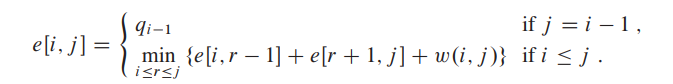

**Demostrando la correctitud**

Al inicio de nuestro algoritmo las matriz e[] contendrá los mínimos obtenidos en cada iteración de l...n, para lograr calcular el costo mínimo.

Inicialización:

Al principio se crean y se inicializa la diagonal de la matriz e[] que contiene la suma de los costos mínimos, esto siempre será correcto porque aún no tenemos sub problemas


Mantención:

Durante la ejecución se sumarán las probabilidades para cada raíz $k_0...K_n$ y se calculara el costo mínimo, esto es correcto porque se irán guardando solo los mínimos calculados en la matriz e[].


Finalización: 

Por último vamos a tener la solución del problema final gracias este paradigma de programación dinámica 


# **4.Tiempo de ejecución**

# **5.Experimentos**

In [ ]:
import random
import numpy as np
from timeit import repeat
import matplotlib.pyplot as plt

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q.tolist()

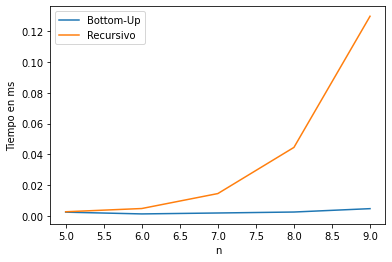

In [ ]:
x=[]; y1=[]; y2=[];

for n in range(5,10):
  keys, p, q = optimal_bst_instance_generator(n)
  cont = [0]
  verbose = False
  t1= repeat(setup="from __main__ import optimalBST", stmt=f"optimalBST({p},{q},{len(p)},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import recursiveBST", stmt=f"recursiveBST({p},{q},{cont},{1},{len(p)},{verbose})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bottom-Up", "Recursivo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# **6.Análisis gráfico:**

OptimalBST v/s recursiveBST:

Se puede observar que ambos métodos tienen distintos tiempos para encontrar el costo mínimo de búsqueda binaria de árbol, es bastante notoria la diferencia de tiempo que tardan solucionado el mismo problema esto se produce debido a que la programación dinámica es mucho mejor y más eficiente en este tipo de problemas.

Incluso si analizamos el gráfico pareciera que el método botton-up es casi lineal y el recursivo tiene estilo de un crecimiento cuadratico aun que es $3^n$

